In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Set seed for reproducibility
seed_value = 42

# 2. Set NumPy's seed
np.random.seed(seed_value)

# 3. Set TensorFlow's seed
tf.random.set_seed(seed_value)

In [4]:
x_train.shape

(60000, 28, 28)

In [22]:
y_train.shape

(60000,)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
y_test.shape

(10000,)

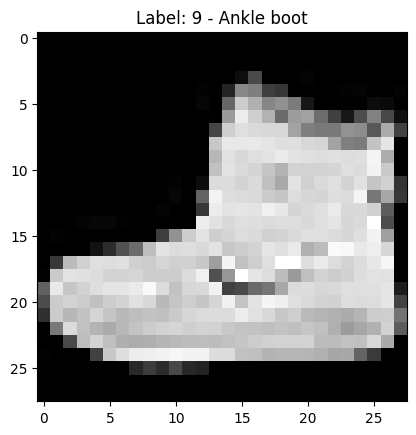

In [6]:
# Class names corresponding to the Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a specific image and its label
i = 0  # Change the index to visualize different images
plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Display the image
plt.title(f'Label: {y_train[i]} - {class_names[y_train[i]]}')  # Display the label and class name
plt.show()

In [7]:
# Normalize the data (scale pixel values to range [0, 1])
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Reshape the data to include a channel dimension (since Fashion MNIST is grayscale, channel=1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [9]:
# Build the CNN model
model = models.Sequential()

In [10]:
# First convolutional layer + MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer + MaxPooling
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer + MaxPooling
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Flatten for fully connected layers
model.add(layers.Flatten())

In [12]:
# Fully connected layers with Dropout to prevent overfitting
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout to reduce overfitting
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))

# Output layer with softmax (for 10 classes in Fashion MNIST)
model.add(layers.Dense(10, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,272 (1.35 MB)

 Trainable params: 118,090 (461.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,182 (922.59 KB)

In [17]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Stop if no improvement after 10 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_data=(x_test, y_test),
    validation_split=0.2,  # 20% of the training data will be used for validation
    callbacks=[early_stopping]
)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8717 - loss: 0.3657 - val_accuracy: 0.8699 - val_loss: 0.3539
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8784 - loss: 0.3411 - val_accuracy: 0.8755 - val_loss: 0.3383
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8846 - loss: 0.3238 - val_accuracy: 0.8762 - val_loss: 0.3375
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8887 - loss: 0.3110 - val_accuracy: 0.8767 - val_loss: 0.3369
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8943 - loss: 0.2951 - val_accuracy: 0.8797 - val_loss: 0.3241
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9002 - loss: 0.2790 - val_accuracy: 0.8859 - val_loss: 0.3188
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9045 - loss: 0.2693 - val_accuracy: 0.8835 - val_loss: 0.3246
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9069 - loss: 0.2578 - val_accuracy: 

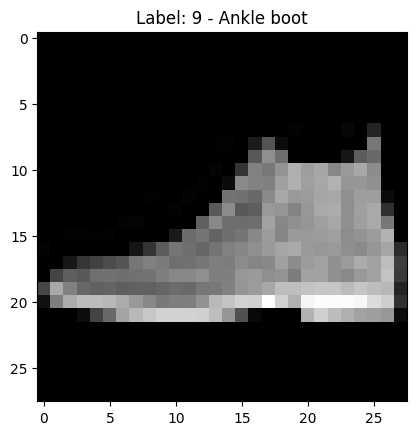

In [23]:
# Class names corresponding to the Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a specific image and its label
i = 0  # Change the index to visualize different images
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image
plt.title(f'Label: {y_test[i]} - {class_names[y_test[i]]}')  # Display the label and class name
plt.show()

In [28]:
x_test[i].shape

(28, 28, 1)

In [27]:
model.predict(x_test[i].reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[9.68064001e-07, 1.07147905e-07, 3.81589871e-10, 1.01189983e-06,
        4.90003416e-08, 4.41434211e-04, 6.12818326e-07, 2.42534261e-02,
        7.81625005e-08, 9.75302279e-01]], dtype=float32)

In [29]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8886 - loss: 0.3226
Test accuracy: 0.8884000182151794


In [30]:
# Predictions on test data
y_pred_prob = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [33]:
y_pred_classes

array([9, 2, 1, ..., 8, 1, 5])

In [34]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

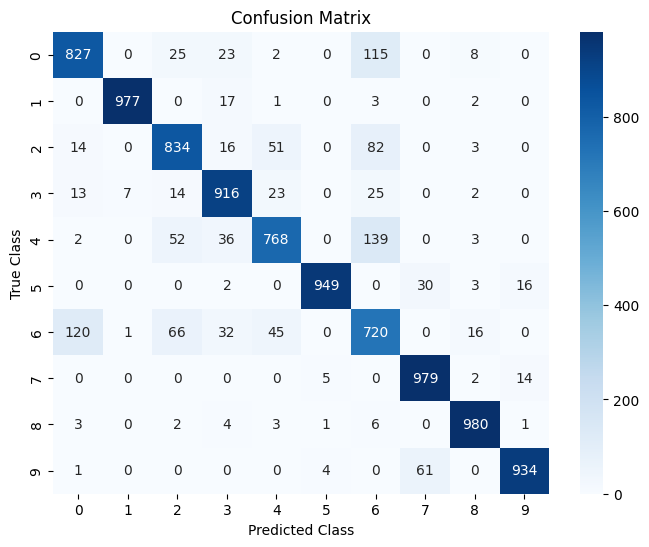

In [35]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

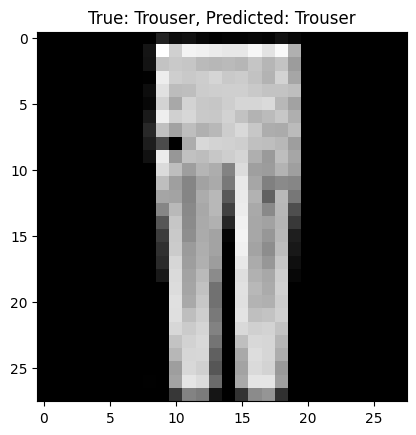

In [37]:
# Class names corresponding to the Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot a specific image and show its true and predicted label
i = 200  # Change this index to visualize different test images

plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Display the image
plt.title(f'True: {class_names[y_test[i]]}, Predicted: {class_names[y_pred_classes[i]]}')
plt.show()

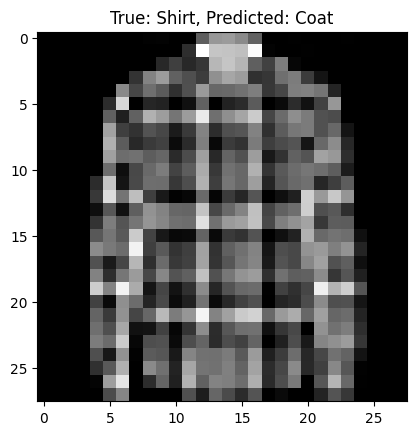

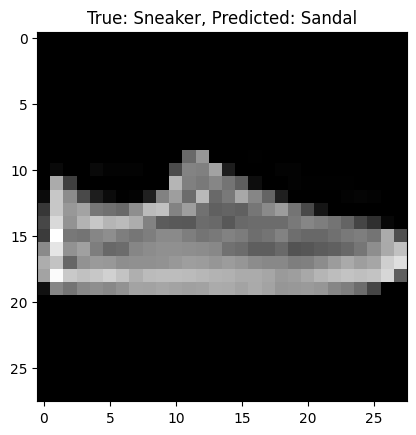

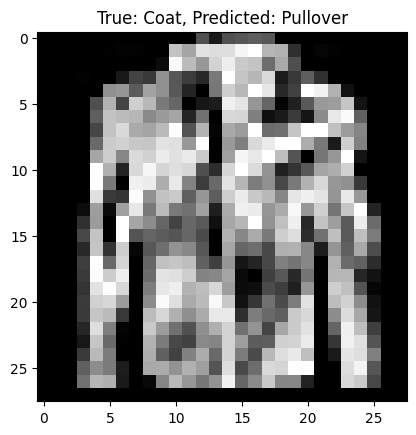

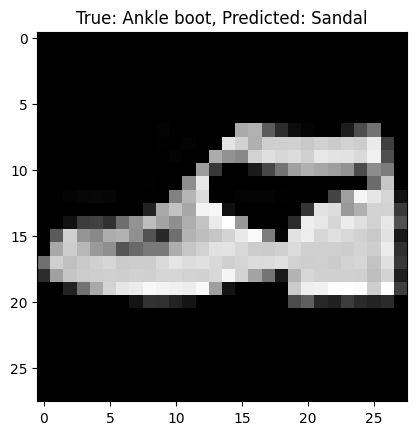

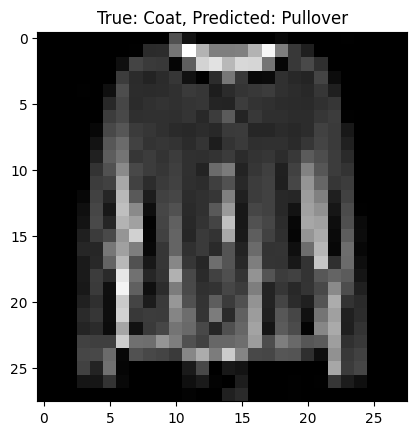

In [38]:
# Class names corresponding to the Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Counter to track how many misclassified images have been shown
misclassified_count = 0

# Visualize misclassified images
for i in range(len(y_test)):
    if y_test[i] != y_pred_classes[i]:  # If the true label does not match the predicted label
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}, Predicted: {class_names[y_pred_classes[i]]}")
        plt.show()

        misclassified_count += 1  # Increment the counter

        # Stop after showing the first 10 misclassified images
        if misclassified_count == 5:
            break


In [40]:
# Display misclassifications
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j and conf_matrix[i][j] > 0:
            print(f'Class {i} misclassified as Class {j}: {conf_matrix[i][j]} instances')

# Classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred_classes, target_names=[str(i) for i in range(10)])
print(report)

Class 0 misclassified as Class 2: 25 instances
Class 0 misclassified as Class 3: 23 instances
Class 0 misclassified as Class 4: 2 instances
Class 0 misclassified as Class 6: 115 instances
Class 0 misclassified as Class 8: 8 instances
Class 1 misclassified as Class 3: 17 instances
Class 1 misclassified as Class 4: 1 instances
Class 1 misclassified as Class 6: 3 instances
Class 1 misclassified as Class 8: 2 instances
Class 2 misclassified as Class 0: 14 instances
Class 2 misclassified as Class 3: 16 instances
Class 2 misclassified as Class 4: 51 instances
Class 2 misclassified as Class 6: 82 instances
Class 2 misclassified as Class 8: 3 instances
Class 3 misclassified as Class 0: 13 instances
Class 3 misclassified as Class 1: 7 instances
Class 3 misclassified as Class 2: 14 instances
Class 3 misclassified as Class 4: 23 instances
Class 3 misclassified as Class 6: 25 instances
Class 3 misclassified as Class 8: 2 instances
Class 4 misclassified as Class 0: 2 instances
Class 4 misclassified

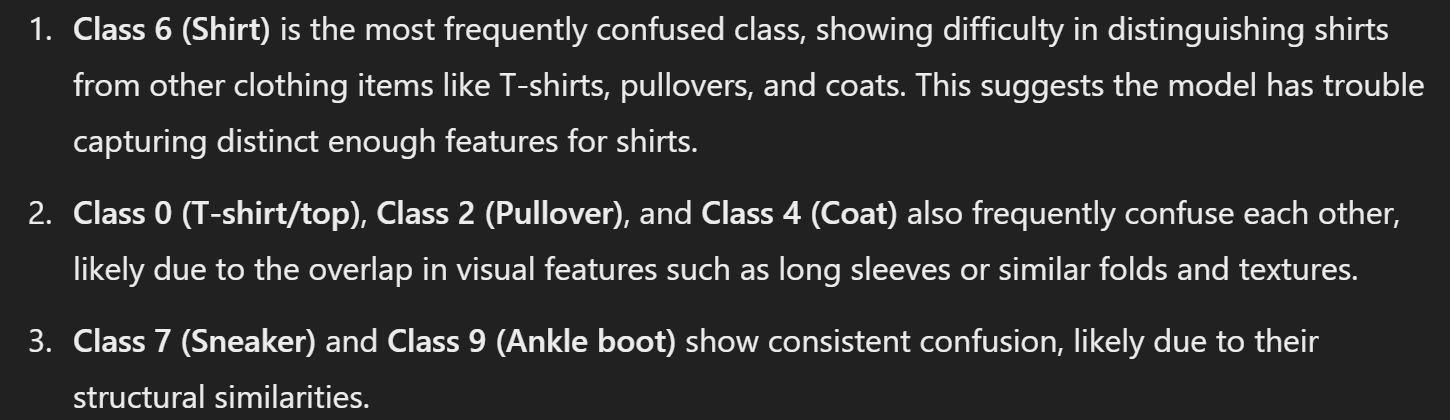

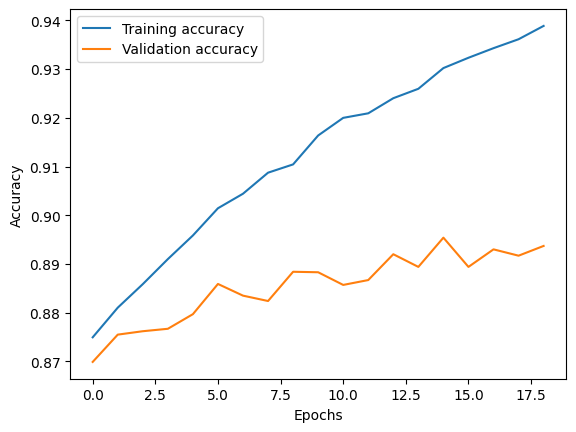

In [41]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

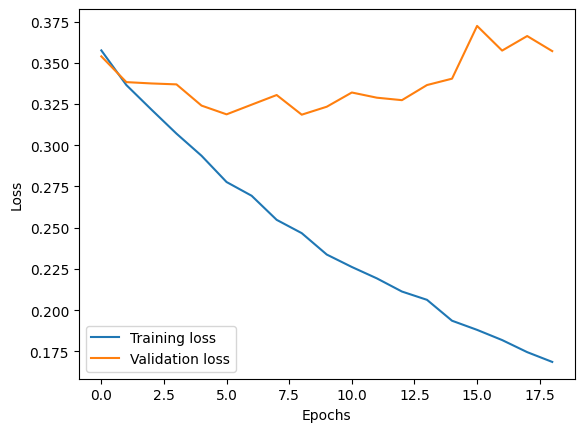

In [42]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import os

# Create the 'saved_model' directory if it doesn't exist
if not os.path.exists('saved_model'):
    os.makedirs('saved_model')

# Save the model in Keras format
model.save('saved_model/fashion_mnist_model.keras')